In [1]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv")
np.random.seed(4)



/home/greatskull/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.shape

(333, 15)

In [4]:

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [5]:
#for removing non numeric data
df = handle_non_numerical_data(df)
print(df.head(5))

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [6]:
#for checking null values
df.isnull().any()

ID         False
crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [7]:
#removing categorical data
df_new = df.drop(['chas','ID','rad'],axis=1)
print(df_new.head(5))
df.shape,df_new.shape

      crim    zn  indus    nox     rm   age     dis  tax  ptratio   black  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296     15.3  396.90   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242     17.8  396.90   
2  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222     18.7  394.63   
3  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222     18.7  396.90   
4  0.08829  12.5   7.87  0.524  6.012  66.6  5.5605  311     15.2  395.60   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   2.94  33.4  
3   5.33  36.2  
4  12.43  22.9  


((333, 15), (333, 12))

In [8]:
#removing outliers 
df_new2 = df_new[df_new.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]



In [9]:
df_new.shape,df_new2.shape

((333, 12), (325, 12))

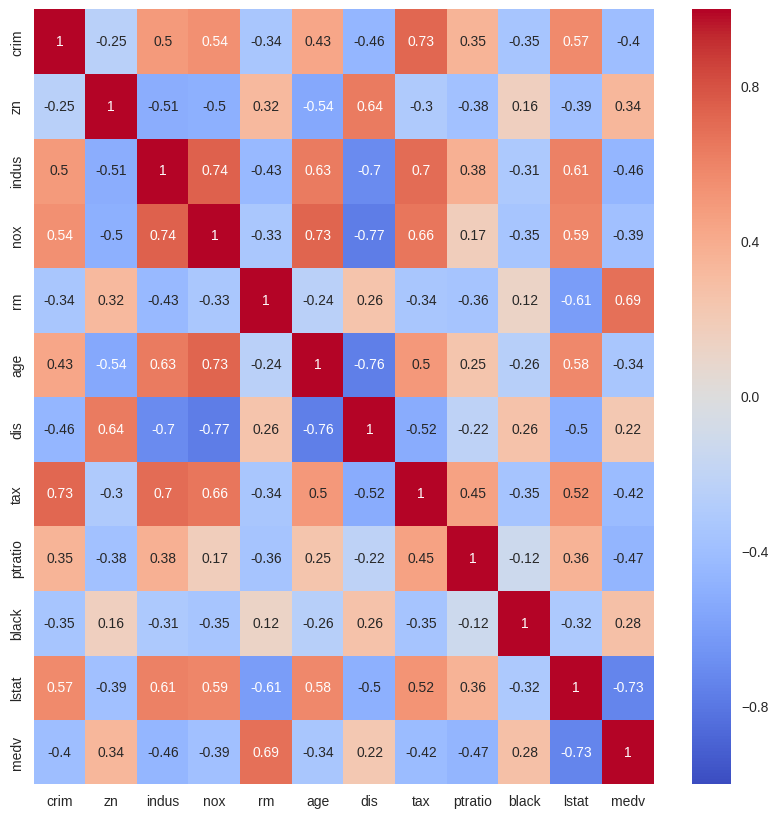

In [10]:
#Get correlations
corr = df_new2.corr()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr, cmap = "coolwarm", annot = True)

In [11]:
df_new2.skew()

crim       2.646708
zn         2.332891
indus      0.346733
nox        0.771853
rm         0.290768
age       -0.577285
dis        0.909605
tax        0.706637
ptratio   -0.752922
black     -3.390695
lstat      0.973360
medv       1.189365
dtype: float64

In [12]:
df_new2['crim'].apply(np.log)
#df_new['zn'].apply(np.log)

0     -5.064036
1     -3.600502
2     -3.430523
3     -2.672924
4     -2.427128
5     -1.492144
6     -2.141572
7     -2.366804
8     -0.462416
9     -0.449480
10    -0.466187
11     0.052526
12    -0.219762
13     0.224575
14    -0.160122
15     0.209020
16    -0.011637
17    -0.045238
18     0.122934
19     0.303595
20     0.477984
21    -1.742684
22    -3.588853
23    -3.393527
24    -1.955456
25    -1.836589
26    -2.098094
27    -1.763639
28    -1.669400
29    -1.472855
         ...   
303    2.059152
304    1.151711
305    1.328395
306    1.486655
307    2.745712
308    2.570710
309    1.395851
310    1.272196
311    2.086391
312    1.583383
313    2.709609
314    2.325618
315    2.662613
316    1.761989
317    1.741900
318    1.036162
319    0.866499
320    1.739018
321    1.576020
322   -1.891403
323   -1.572817
324   -2.246772
325   -2.195346
326   -1.752673
327   -1.315351
328   -1.726927
329   -2.770511
330   -3.095111
331   -2.800824
332   -3.048922
Name: crim, dtype: float

In [13]:
data = (df_new2 - df_new2.mean())/df_new2.std()

In [14]:
data2 = (data - data.mean())/(data.max() - data.min())

In [15]:
#re-add categorical data if you're done with pre-processing. 
x3=data2
y3=data2['medv']
data2['ID'] =df['ID']
data2['chas']= df['chas']
data2['rad']=df['rad']
x= data2
y = data2['medv']
x1=df_new2
y1=df_new2['medv']
x2=df
y2=df['medv']



In [16]:
def eval(X,Y,n):
    
    train_score=0
    test_score=0
    train_loss=0
    test_loss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30)
        model = LinearRegression().fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        train_loss+=sklearn.metrics.mean_squared_error(Y_train, Y_predtrain)
        test_loss+=sklearn.metrics.mean_squared_error(Y_test, Y_predtest)
    print(train_score/n)
    print(train_loss/n)
    print(test_score/n)
    print(test_loss/n)   

In [17]:
eval(x,y,300)

1.0
2.7798281043e-29
1.0
2.83053317791e-29


In [18]:
eval(x1,y1,300)

1.0
3.27852299639e-29
1.0
3.33273066769e-29


In [19]:
eval(x2,y2,300)

1.0
2.68306698447e-29
1.0
2.71944087089e-29


In [20]:
eval(x3,y3,300)

1.0
2.69896055419e-29
1.0
2.71384042002e-29


In [29]:
x.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv,ID,chas,rad
0,-0.093825,0.070477,-0.326516,-0.033042,0.057263,-0.026331,0.035110,-0.204512,-0.361038,0.080720,-0.200500,0.020229,1,0,1
1,-0.093093,-0.109523,-0.150220,-0.175017,0.027441,0.119414,0.126658,-0.307763,-0.070340,0.080720,-0.085710,-0.033825,2,0,2
2,-0.092916,-0.109523,-0.331331,-0.197651,0.139176,-0.232714,0.240961,-0.346004,0.034311,0.074665,-0.256791,0.231940,4,0,3
3,-0.091636,-0.109523,-0.331331,-0.197651,0.168030,-0.143352,0.240961,-0.346004,0.034311,0.080720,-0.190842,0.295003,5,0,3
4,-0.090964,0.015477,-0.120590,-0.061849,-0.051761,-0.011437,0.188595,-0.175832,-0.372665,0.077252,0.005074,-0.004546,7,0,5
